##### This notebook shows how to build a reduced scenario tree out of a scenario fan using scenred2
##### The scenred2.jl package tree and fan structures are converted into directed graphs of lighgraphs package to be plot using TikzGraphs and TikzPictures
##### If you don't want to plot or install tikz packages you can delete all lines containing TikzGraphs and TikzPictures and still run the scenario tree construction

In [1]:
using Scenred2, LightGraphs, TikzGraphs, TikzPictures

In [2]:
T = 5 #number of time steps
S = 19 # number of scenarios
R = 2 # number of random variables

# we create randomly a discrete probability distribution for the S scenarios
probas = rand(S)
probas = round.(probas./sum(probas),4)
probas[end] = 1-sum(probas[1:end-1])

# we create S random scenarios
scenarios = [Scenred2Scenario(p, round.(rand(T,R),3)) for p in probas ]

# We build a fan out of the S scenarios associated with their probability
fan = Scenred2Fan(T,S,R,scenarios)

Scenred2.Scenred2Fan(5, 19, 2, Scenred2.Scenred2Scenario[Scenred2.Scenred2Scenario(0.1026, [0.271 0.638; 0.87 0.522; … ; 0.188 0.896; 0.632 0.897]), Scenred2.Scenred2Scenario(0.0141, [0.25 0.122; 0.442 0.027; … ; 0.108 0.478; 0.05 0.612]), Scenred2.Scenred2Scenario(0.092, [0.409 0.293; 0.799 0.474; … ; 0.106 0.529; 0.121 0.345]), Scenred2.Scenred2Scenario(0.0886, [0.038 0.118; 0.485 0.972; … ; 0.405 0.316; 0.423 0.398]), Scenred2.Scenred2Scenario(0.0081, [0.038 0.89; 0.828 0.468; … ; 0.649 0.522; 0.67 0.078]), Scenred2.Scenred2Scenario(0.0279, [0.487 0.719; 0.93 0.79; … ; 0.705 0.655; 0.679 0.207]), Scenred2.Scenred2Scenario(0.0609, [0.935 0.73; 0.394 0.381; … ; 0.381 0.507; 0.286 0.91]), Scenred2.Scenred2Scenario(0.1054, [0.469 0.359; 0.56 0.454; … ; 0.873 0.676; 0.359 0.065]), Scenred2.Scenred2Scenario(0.0541, [0.259 0.38; 0.092 0.02; … ; 0.582 0.962; 0.217 0.985]), Scenred2.Scenred2Scenario(0.0203, [0.028 0.88; 0.949 0.758; … ; 0.723 0.987; 0.674 0.132]), Scenred2.Scenred2Scenario(0

In [3]:
# if the fan is reasonably small we plot and save it using tikzgraphs 
if S<20
    fdg = DiGraph(fan) #we convert the fan into a directed graph of lightgraphs
    ft=TikzGraphs.plot(fdg[1], string.(fdg[3]), edge_labels = fdg[2] ) #we plot the digraph
    TikzPictures.save(PDF("fan"), ft) #we save it as fan.pdf in the active directory
end

In [4]:
prms = Scenred2Prms(red_percentage = 0.5) # we define scenred2 parameters, all default except the reduction percentage

tree = Scenred2Tree(fan, prms) # we build a tree out of the fan calling scenred2 with the parameters


***********************************************
*  SCENARIO TREE CONSTRUCTION / REDUCTION     *
*                                             *
*  S C E N R E D - 2                          *
*                                             *
*  VERSION: 12/12/2008                        *
*                                             *
*  (C) - Humboldt-University Berlin           *
*        Institute of Mathematics             *
*        Written by: Holger Heitsch           *
*                                             *
***********************************************

YOU ARE EXECUTING THE COMMAND LINE VERSION

MAIN: READ COMMAND FILE
    OUTPUT OF TREE
    TREE CONSTRUCTION SELECTED
    READ SCENARIO PARAMETERS
MAIN: READ COMMAND FILE DONE
MAIN: START TREE CONSTRUCTION
    DETECT CONSTRUCTION METHOD
    CONSTRUCTION METHOD BACKWARD
    READ CONSTRUCTION OPTIONS
    ASSIGN SCENARIO DISTANCES
    START BACKWARD TREE CONSTRUCTION
      REDUCTION METHOD: FORWARD
    *** SCENARIO TREE C

Scenred2.Scenred2Tree(13, 2, Scenred2.Scenred2Node[Scenred2.Scenred2Node(1, 1.0, [0.4352, 0.5075]), Scenred2.Scenred2Node(1, 1.0, [0.511, 0.532]), Scenred2.Scenred2Node(2, 0.3947, [0.309, 0.859]), Scenred2.Scenred2Node(2, 0.6053, [0.559, 0.216]), Scenred2.Scenred2Node(3, 0.3947, [0.873, 0.676]), Scenred2.Scenred2Node(4, 0.2551, [0.814, 0.551]), Scenred2.Scenred2Node(4, 0.3502, [0.704, 0.408]), Scenred2.Scenred2Node(5, 0.1049, [0.632, 0.897]), Scenred2.Scenred2Node(5, 0.1061, [0.121, 0.345]), Scenred2.Scenred2Node(5, 0.1837, [0.359, 0.065]), Scenred2.Scenred2Node(6, 0.2551, [0.24, 0.876]), Scenred2.Scenred2Node(7, 0.2637, [0.401, 0.146]), Scenred2.Scenred2Node(7, 0.0865, [0.281, 0.666])])

In [5]:
dg = DiGraph(tree) #we convert the tree as a directed graph

({13, 12} directed simple Int64 graph, Dict{Any,Any}(Pair{Any,Any}((2, 3), 0.3947),Pair{Any,Any}((7, 13), 0.0865),Pair{Any,Any}((4, 6), 0.2551),Pair{Any,Any}((4, 7), 0.3502),Pair{Any,Any}((5, 9), 0.1061),Pair{Any,Any}((5, 10), 0.1837),Pair{Any,Any}((5, 8), 0.1049),Pair{Any,Any}((2, 4), 0.6053),Pair{Any,Any}((1, 2), 1.0),Pair{Any,Any}((6, 11), 0.2551)…), Array{Float64,1}[[0.4352, 0.5075], [0.511, 0.532], [0.309, 0.859], [0.559, 0.216], [0.873, 0.676], [0.814, 0.551], [0.704, 0.408], [0.632, 0.897], [0.121, 0.345], [0.359, 0.065], [0.24, 0.876], [0.401, 0.146], [0.281, 0.666]])

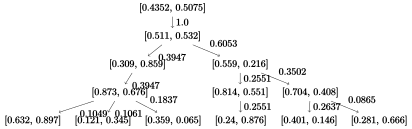

In [6]:
t=TikzGraphs.plot(dg[1], string.(dg[3]), edge_labels = dg[2] ) #we plot it

In [7]:
TikzPictures.save(PDF("tree"), t) #we save it as tree.pdf in the active directory